In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
import cv2
import matplotlib.pyplot as plt


In [ ]:
def read_img(idx):
  data_folder= '/content/drive/MyDrive/OtsuData/'
  files = os.listdir(data_folder)
  img_file = os.path.join(data_folder,files[idx])
  gray_img = cv2.imread(img_file,0)
  return gray_img

def otsu_thr(img):
  ret2,img_thr = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  return img_thr

def visualize_img(img,title_str=''):
  plt.figure(),plt.imshow(img),plt.title(title_str),plt.show()

def multi_plot(imgs,title_str=None):
  
  fig, axs = plt.subplots(1,len(imgs),figsize=(18,6))
  fig.suptitle('Images')
  for k in range(len(imgs)):
    img = imgs[k]
    axs[k].imshow(imgs[k])
    if not title_str is None:
      axs[k].set_title(title_str[k])
  plt.show()

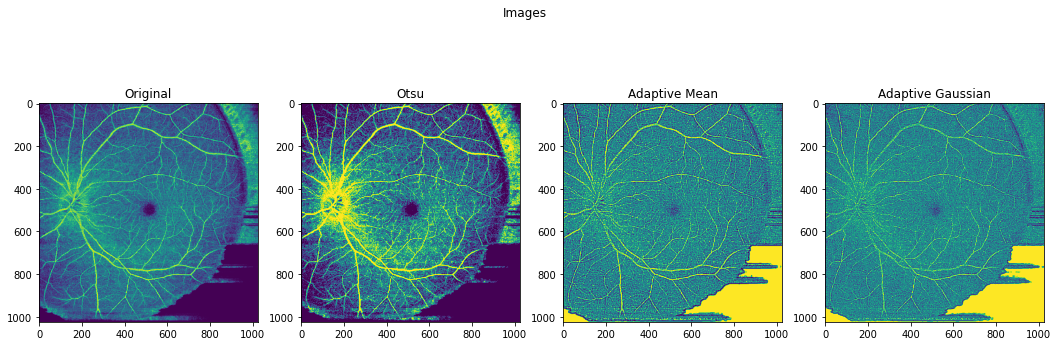

In [ ]:
idx=1
img = read_img(idx)
img_otsu = otsu_thr(img)
img_adp_mean = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
img_adp_gs = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

# visualize_img(img,title_str='Original')
# visualize_img(img_otsu,title_str='Otsu')
# visualize_img(img_adp_mean,title_str='Adaptive Mean')
# visualize_img(img_adp_gs,title_str='Adaptive Gaussian')

imgs = (img,img_otsu,img_adp_mean,img_adp_gs)
title_str = ('Original','Otsu','Adaptive Mean','Adaptive Gaussian')
multi_plot(imgs,title_str=title_str)

